# 模块三：通过知识图谱可视化揭示关联

**目标**：本笔记本介绍NetworkX，这是一个用于创建、操作以及研究复杂网络的结构、动态和功能的Python库。我们将重点关注：
- 基本概念：节点、边和属性。
- 从数据构建简单的知识图谱。
- 使用不同布局可视化图谱。
**将使用的库**：NetworkX、Matplotlib

In [1]:
#-------------------------------------------------------------------------------
# SETUP
#-------------------------------------------------------------------------------
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd # For loading data from CSV if needed

print("Libraries imported successfully!")

Libraries imported successfully!


## 知识图谱与NetworkX简介

**知识图谱**以结构化的方式表示实体（节点）及其关系（边）。NetworkX是用于此目的的通用工具。
- **节点**：表示实体（例如，人、概念、物品）。
- **边**：表示实体之间的关系。可以是有向的或无向的。
- **属性**：节点和边可以具有属性（例如，类型、权重、标签）。

In [2]:
#-------------------------------------------------------------------------------
# Creating a Simple Graph
#-------------------------------------------------------------------------------
# --- Initialize a Graph ---
G_simple = nx.Graph() # For an undirected graph
# G_simple_directed = nx.DiGraph() # For a directed graph

In [3]:
# --- Add Nodes ---
G_simple.add_node("Alice")
# G_simple.add_nodes_from()
G_simple.add_node("David", role="Developer") # Node with an attribute

print("Nodes in G_simple:", G_simple.nodes(data=True))

Nodes in G_simple: [('Alice', {}), ('David', {'role': 'Developer'})]


In [4]:
# --- Add Edges ---
G_simple.add_edge("Alice", "Bob")
# G_simple.add_edges_from()
G_simple.add_edge("Charlie", "David", relationship="coworker", weight=0.8) # Edge with attributes

print("Edges in G_simple:", G_simple.edges(data=True))

Edges in G_simple: [('Alice', 'Bob', {}), ('David', 'Charlie', {'relationship': 'coworker', 'weight': 0.8})]


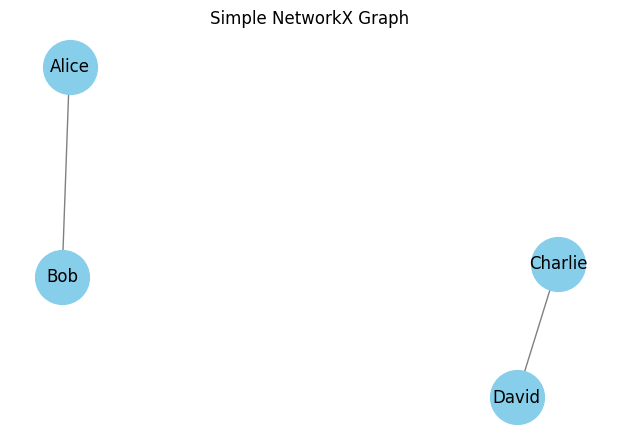

In [5]:
# --- Basic Visualization ---
plt.figure(figsize=(6, 4))
nx.draw(G_simple, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray')
plt.title("Simple NetworkX Graph")
plt.show()

## 实践操作：人物关系

让我们创建一个小型知识图谱，来表示虚构作品中人物之间的关系（例如，《权力的游戏》部分角色）。我们将使用预定义的边列表。
（数据可以来自CSV文件，例如，Melanie Walsh数据集中 `got - edges.csv` 的简化版本）

In [6]:
#-------------------------------------------------------------------------------
# Task: Character Network (Code Cells)
#-------------------------------------------------------------------------------
# --- Prepare/Load Data ---
# For a workshop, provide a small, direct edgelist or a simple CSV.
# Example edgelist (Source, Target, Weight/Relationship_Type)
# This is a highly simplified example.
character_df = pd.read_csv('got-edges.csv')

In [7]:
# --- Build the Graph ---
G_chars = nx.from_pandas_edgelist(character_df, 'Source', 'Target', edge_attr='Weight')

print("Nodes in Character Graph:", G_chars.nodes())
print("Edges in Character Graph (with data):", list(G_chars.edges(data=True))[:3]) # Print first 3 for brevity

Nodes in Character Graph: ['Aemon', 'Grenn', 'Samwell', 'Aerys', 'Jaime', 'Robert', 'Tyrion', 'Tywin', 'Alliser', 'Mance', 'Amory', 'Oberyn', 'Arya', 'Anguy', 'Beric', 'Bran', 'Brynden', 'Cersei', 'Gendry', 'Gregor', 'Joffrey', 'Jon', 'Rickon', 'Roose', 'Sandor', 'Thoros', 'Balon', 'Loras', 'Belwas', 'Barristan', 'Illyrio']
Edges in Character Graph (with data): [('Aemon', 'Grenn', {'Weight': 5}), ('Aemon', 'Samwell', {'Weight': 31}), ('Aerys', 'Jaime', {'Weight': 18})]


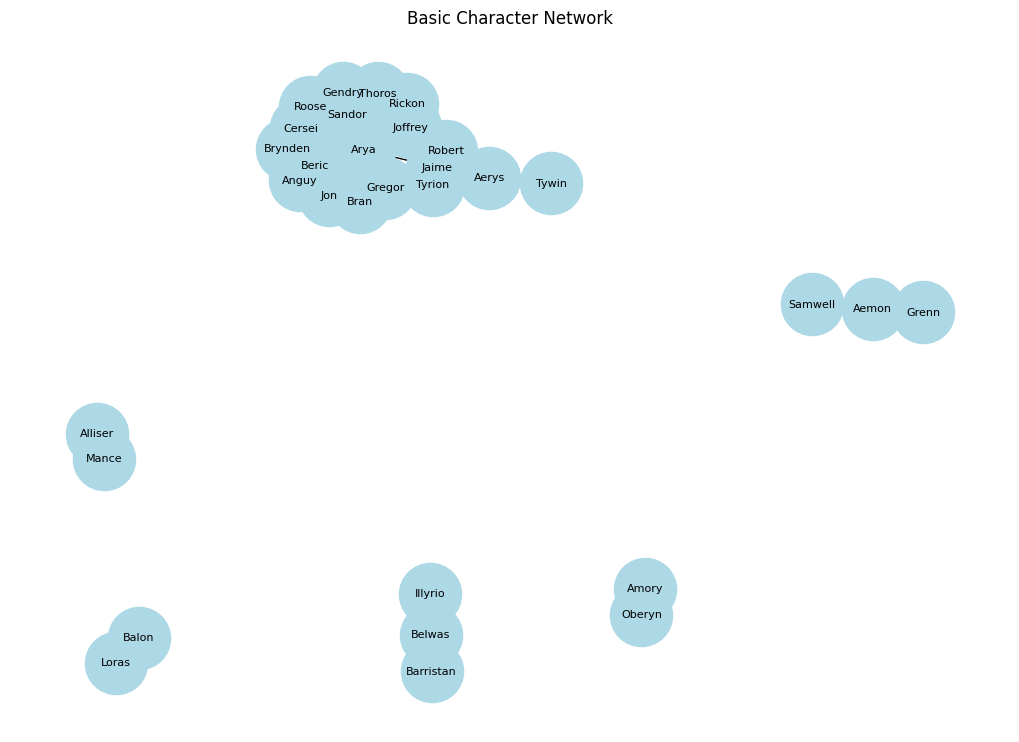

In [8]:
# --- Basic Visualization with Labels ---
plt.figure(figsize=(10, 7))
nx.draw(G_chars, with_labels=True, node_color='lightblue', node_size=2000, font_size=8)
plt.title("Basic Character Network")
plt.show()

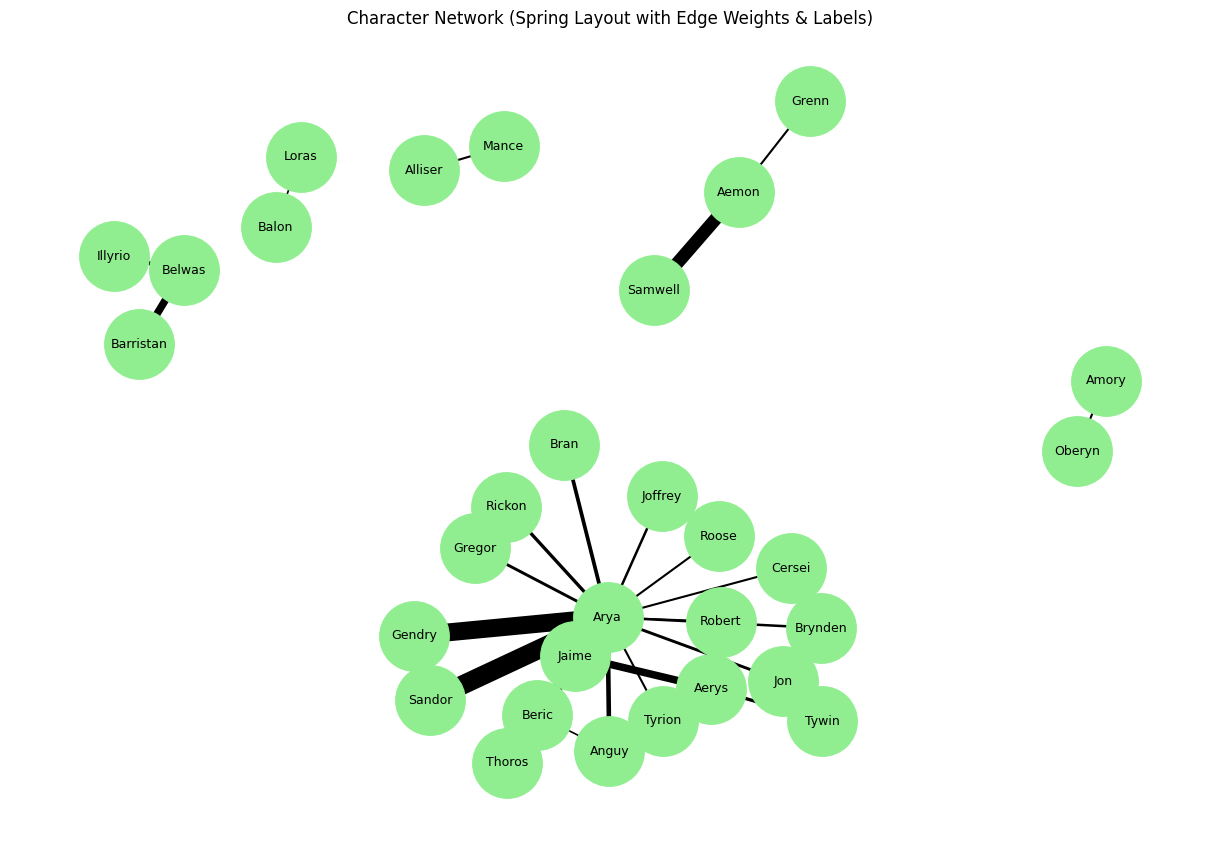

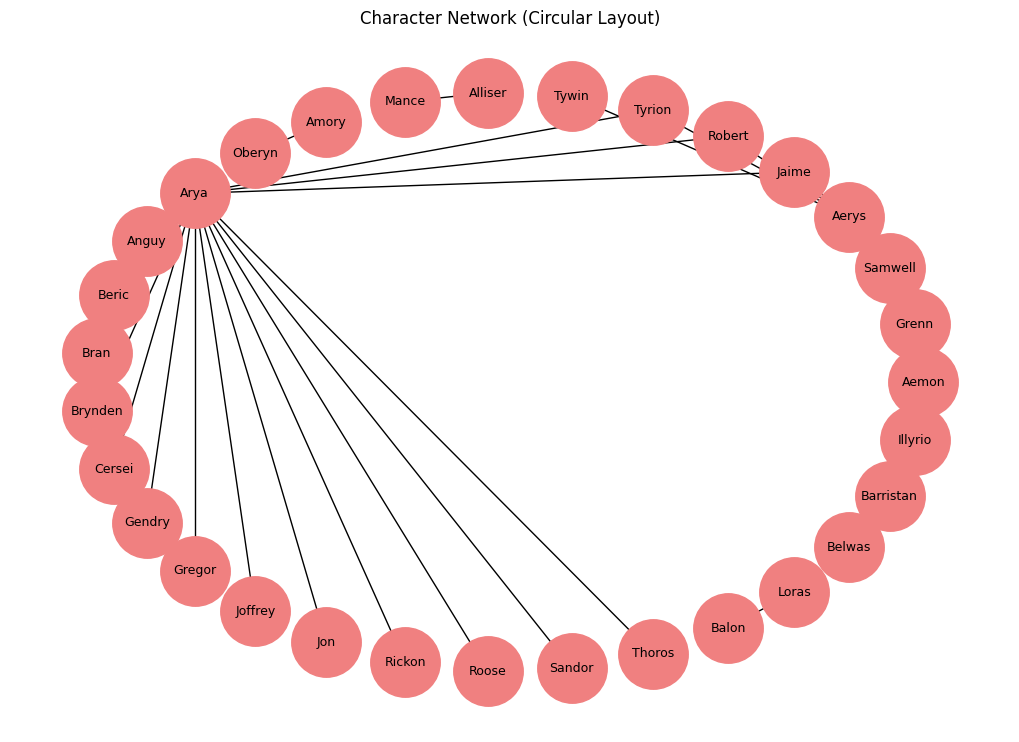

In [9]:
# --- 4.2.4 Exploring Layout Algorithms ---
"""
NetworkX offers various layout algorithms to position nodes.[25, 26]
Some common ones:
- `nx.spring_layout(G)`: Force-directed, good for showing community structure.
- `nx.circular_layout(G)`: Nodes on a circle.
- `nx.random_layout(G)`: Random positions.
- `nx.shell_layout(G)`: Nodes in concentric shells.
"""
plt.figure(figsize=(12, 8))
pos_spring = nx.spring_layout(G_chars, k=0.5, iterations=50) # k adjusts spacing
nx.draw(G_chars, pos_spring, with_labels=True, node_color='lightgreen', node_size=2500, font_size=9, width=[d['Weight']*0.3 for u,v,d in G_chars.edges(data=True)])
# Extract edge labels for drawing
edge_labels = {(u, v): d.get('relation', '') for u, v, d in G_chars.edges(data=True)} # Use relation if available
nx.draw_networkx_edge_labels(G_chars, pos_spring, edge_labels=edge_labels, font_size=7)
plt.title("Character Network (Spring Layout with Edge Weights & Labels)")
plt.show()

plt.figure(figsize=(10, 7))
pos_circular = nx.circular_layout(G_chars)
nx.draw(G_chars, pos_circular, with_labels=True, node_color='lightcoral', node_size=2500, font_size=9)
plt.title("Character Network (Circular Layout)")
plt.show()

In [10]:
# --- Basic Styling (Optional) ---
# Example: Node size by degree, node color by a hypothetical attribute
# degrees = dict(G_chars.degree())
# node_sizes = [v * 300 for v in degrees.values()]
# node_colors = ['red' if G_chars.degree(node) > 2 else 'blue' for node in G_chars.nodes()]

# plt.figure(figsize=(12, 8))
# nx.draw(G_chars, pos_spring, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=9)
# plt.title("Styled Character Network (Size by Degree, Color by Condition)")
# plt.show()

## 应用

知识图谱可视化在以下方面很有用：
- **研究**：
    - 绘制引用网络或共同作者模式。
    - 可视化文本或本体中的概念关系。
    - 分析社交网络、组织结构。
    - 探索生物途径或分子相互作用。
- **教学**：
    - 解释复杂系统和关系（例如，历史事件、文学人物互动）。
    - 介绍图论概念。
    - 推动学生进行网络分析项目。 

## 结论

我们使用NetworkX构建和可视化简单知识图谱。这个强大的库为网络分析和更复杂的可视化（通常与其他工具结合使用）提供了更多功能。

## 练习

基于Kaggle的电影数据集(https://www.kaggle.com/datasets/utsh0dey/25k-movie-dataset)，结合本课程设计一个可视分析工具，对电影媒体进行分析
